In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

#### Compton Scatter Cross Section
We define it as follows:
$$
h_c(\cos\omega) = \frac{1}{1+\varepsilon(1-\cos\omega)}\left(\frac{1}{1+\varepsilon(1-\cos\omega)}+1+\varepsilon(1-\cos\omega-(1-\cos^2\omega))\right),
$$
with $\varepsilon = E_0/m_ec^2$ for incident energy $E_0$.

In [3]:
def h_c(z,epsilon):
    q = 1 / (1 + epsilon * (1 - z))
    return q**2 * (q + 1 / q - (1-z**2))

In [4]:
def arrowed_spines(fig, ax,axDims):

    xmin, xmax,ymin, ymax = axDims

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    #plt.xticks([]) # labels 
    #plt.yticks([])
    #ax.xaxis.set_ticks_position('none') # tick markers
    #ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


In [5]:
omega = np.linspace(-np.pi,np.pi,1000)
cosOmega = np.cos(omega)
h_c520 = h_c(cosOmega,511/511)
h_c140 = h_c(cosOmega,140/511)
h_c360 = h_c(cosOmega,360/511)

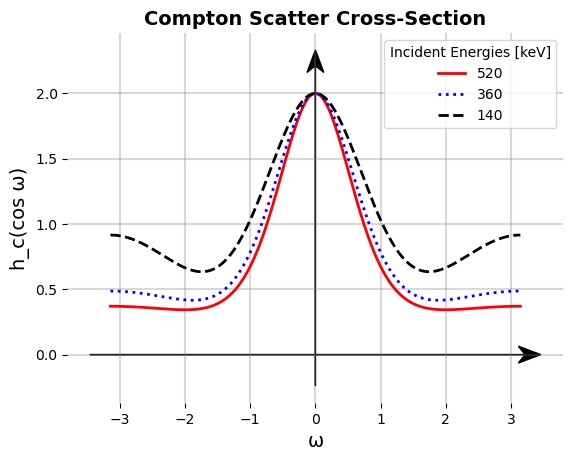

In [6]:
# plot
plt.plot(omega, h_c520,label='520',color = [1,0,0],linestyle='solid',linewidth=2)
plt.plot(omega, h_c360,label='360',color = [0,0,1],linestyle='dotted',linewidth = 2)
plt.plot(omega, h_c140,label='140',color = [0,0,0],linestyle='dashed',linewidth=2)
fig = plt.gcf()
ax = plt.gca()

#axis dimensions
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
ymax +=0.25
ymin -=0.5
axDims = [xmin,xmax,ymin,ymax]
arrowed_spines(fig, ax,axDims)
plt.legend(title='Incident Energies [keV]')
plt.grid(color=[0.5,0.5,0.5],alpha=0.3, linestyle='-', linewidth=1.5)
plt.title('Compton Scatter Cross-Section',fontsize=14,weight='bold')
plt.ylabel(r'h_c(cos ω)',fontsize=14)
plt.xlabel('ω',fontsize=14)
plt.savefig('Images/ComptonScatterCrossSection.png')
plt.show()


#### The Differential Integration Cross-Section Convolution Kernel
We define it as follows:
$$
h(\cos\omega) = h_c(\cos\omega)\frac{1+\cos^2\omega + \frac{\varepsilon^2(1-\cos\omega)^2}{1+\varepsilon(1-\cos\omega)}}{(1+\varepsilon(1-\cos\omega))^2}
$$

In [8]:
def h(z,epsilon):
    return h_c(z,epsilon)*(1+z**2+ ( epsilon**2*(1-z) )**2/(1+epsilon*(1-z)) )/(1+epsilon*(1-z))**2

In [9]:
omega = np.linspace(-np.pi,np.pi,1000)
cosOmega = np.cos(omega)
h520 = h(cosOmega,511/511)
h140 = h(cosOmega,140/511)
h360 = h(cosOmega,360/511)

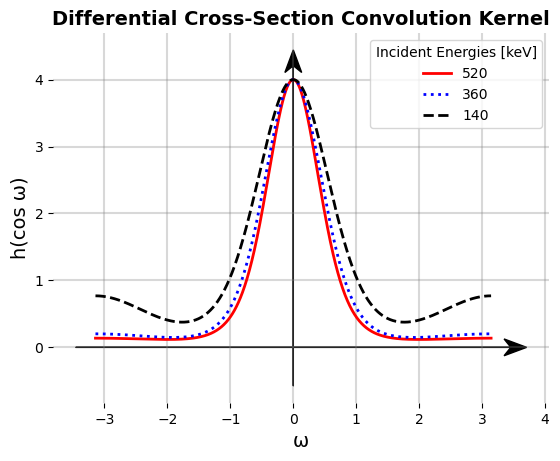

In [10]:
# plot
plt.plot(omega, h520,label='520',color = [1,0,0],linestyle='solid',linewidth=2)
plt.plot(omega, h360,label='360',color = [0,0,1],linestyle='dotted',linewidth = 2)
plt.plot(omega, h140,label='140',color = [0,0,0],linestyle='dashed',linewidth=2)
fig = plt.gcf()
ax = plt.gca()

#axis dimensions
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
ymax +=0.25
ymin -=0.5
xmax +=0.25
axDims = [xmin,xmax,ymin,ymax]
arrowed_spines(fig, ax,axDims)
plt.legend(title='Incident Energies [keV]')
plt.grid(color=[0.5,0.5,0.5],alpha=0.3, linestyle='-', linewidth=1.5)
plt.title('Differential Cross-Section Convolution Kernel',fontsize=14,weight='bold')
plt.ylabel(r'h(cos ω)',fontsize=14)
plt.xlabel('ω',fontsize=14)
plt.savefig('Images/DifferentialCrossSectionConvolutionKernel.png')
plt.show()

#### The Summation Image of a Point Source
We define it as follows:
$$
h_\mathrm{bp}(\cos\omega) = \frac{1}{\sqrt{1-\cos^2\frac{\omega}{2}}}\int_{-\cos\frac{\omega}{2}}^{\cos\frac{\omega}{2}}\mathrm{d}z\frac{h(z)}{\sqrt{\cos^2\frac{\omega}{2}-z^2}}
$$

Using that $\cos^2\omega/2 = (1+\cos\omega)/2$ we can write this as a function of $\cos\omega$.

In [12]:
def integrand(x,epsilon,z):
    q0 = (1+z)/2
    return h(x,epsilon)/np.sqrt(q0-x**2)


def h_bp(z,epsilon):
    q0 = (1+z)/2
    q = 1/np.sqrt(1-q0)
    result,error = spi.quad(integrand,-np.sqrt(q0),np.sqrt(q0),args=(epsilon,z))
    return result*q

In [13]:
omega = np.linspace(-np.pi,np.pi,1000)
cosOmegas = np.cos(omega)
h_bp520 = np.zeros(cosOmegas.shape)
h_bp140 = np.zeros(cosOmegas.shape)
h_bp360 = np.zeros(cosOmegas.shape)
for i,cosOmega in enumerate(cosOmegas):
    h_bp520[i]= h_bp(cosOmega,511/511)
    h_bp140[i] = h_bp(cosOmega,140/511)
    h_bp360[i] = h_bp(cosOmega,360/511)

omega520 = omega[h_bp520<=100]
h_bp520 = h_bp520[h_bp520<=100]

omega140 = omega[h_bp140<=100]
h_bp140 = h_bp140[h_bp140<=100]

omega360 = omega[h_bp360<=100]
h_bp360 = h_bp360[h_bp360<=100]


/tmp/ipykernel_57156/3995506537.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return h(x,epsilon)/np.sqrt(q0-x**2)
/tmp/ipykernel_57156/3995506537.py:9: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result,error = spi.quad(integrand,-np.sqrt(q0),np.sqrt(q0),args=(epsilon,z))


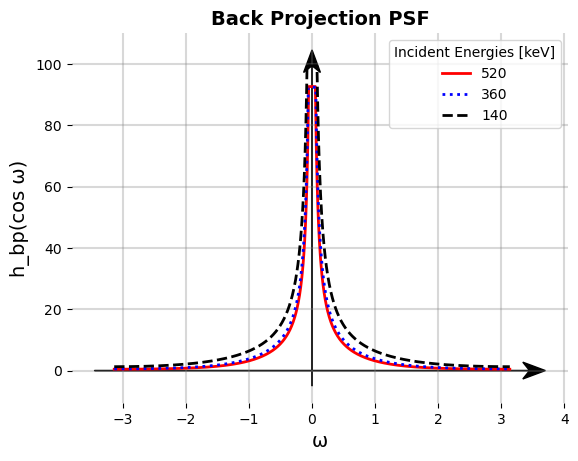

In [14]:
# plot
plt.plot(omega520, h_bp520,label='520',color = [1,0,0],linestyle='solid',linewidth=2)
plt.plot(omega360, h_bp360,label='360',color = [0,0,1],linestyle='dotted',linewidth = 2)
plt.plot(omega140, h_bp140,label='140',color = [0,0,0],linestyle='dashed',linewidth=2)
fig = plt.gcf()
ax = plt.gca()

#axis dimensions
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
ymax +=0.25
ymin -=0.5
xmax +=0.25
axDims = [xmin,xmax,ymin,ymax]
arrowed_spines(fig, ax,axDims)
plt.legend(title='Incident Energies [keV]')
plt.grid(color=[0.5,0.5,0.5],alpha=0.3, linestyle='-', linewidth=1.5)
plt.title('Back Projection PSF',fontsize=14,weight='bold')
plt.ylabel(r'h_bp(cos ω)',fontsize=14)
plt.xlabel('ω',fontsize=14)
plt.savefig('Images/BackProjectionPSF.png')

In [34]:
import sympy as sp

# Define the variable and the expression
x = sp.symbols('x')
E = sp.symbols('E')
expression = h(x,E)
y = sp.symbols('y')
subExpression = (y+1)/2
FU = sp.FU
integrand = expression/sp.sqrt(subExpression+x**2)
xMin = -sp.sqrt(subExpression)
xMax = sp.sqrt(subExpression)
# Calculate the integral
integral = sp.integrate(integrand.simplify().simplify(), (x,xMin,xMax))
#integral

In [35]:
integral

sqrt(2)*(Integral(2*E/(E**6*x**6*sqrt(2*x**2 + y + 1) - 6*E**6*x**5*sqrt(2*x**2 + y + 1) + 15*E**6*x**4*sqrt(2*x**2 + y + 1) - 20*E**6*x**3*sqrt(2*x**2 + y + 1) + 15*E**6*x**2*sqrt(2*x**2 + y + 1) - 6*E**6*x*sqrt(2*x**2 + y + 1) + E**6*sqrt(2*x**2 + y + 1) - 6*E**5*x**5*sqrt(2*x**2 + y + 1) + 30*E**5*x**4*sqrt(2*x**2 + y + 1) - 60*E**5*x**3*sqrt(2*x**2 + y + 1) + 60*E**5*x**2*sqrt(2*x**2 + y + 1) - 30*E**5*x*sqrt(2*x**2 + y + 1) + 6*E**5*sqrt(2*x**2 + y + 1) + 15*E**4*x**4*sqrt(2*x**2 + y + 1) - 60*E**4*x**3*sqrt(2*x**2 + y + 1) + 90*E**4*x**2*sqrt(2*x**2 + y + 1) - 60*E**4*x*sqrt(2*x**2 + y + 1) + 15*E**4*sqrt(2*x**2 + y + 1) - 20*E**3*x**3*sqrt(2*x**2 + y + 1) + 60*E**3*x**2*sqrt(2*x**2 + y + 1) - 60*E**3*x*sqrt(2*x**2 + y + 1) + 20*E**3*sqrt(2*x**2 + y + 1) + 15*E**2*x**2*sqrt(2*x**2 + y + 1) - 30*E**2*x*sqrt(2*x**2 + y + 1) + 15*E**2*sqrt(2*x**2 + y + 1) - 6*E*x*sqrt(2*x**2 + y + 1) + 6*E*sqrt(2*x**2 + y + 1) + sqrt(2*x**2 + y + 1)), (x, -sqrt(2)*sqrt(y + 1)/2, sqrt(2)*sqrt(y + 1)/

In [58]:
integrand = sp.factor(sp.numer(integrand).expand()/sp.denom(integrand).expand())

In [62]:
integral2 = sp.integrate(integrand, (x,xMin,xMax))

In [63]:
integral2

sqrt(2)*(Integral(2*E/(E**6*x**6*sqrt(2*x**2 + y + 1) - 6*E**6*x**5*sqrt(2*x**2 + y + 1) + 15*E**6*x**4*sqrt(2*x**2 + y + 1) - 20*E**6*x**3*sqrt(2*x**2 + y + 1) + 15*E**6*x**2*sqrt(2*x**2 + y + 1) - 6*E**6*x*sqrt(2*x**2 + y + 1) + E**6*sqrt(2*x**2 + y + 1) - 6*E**5*x**5*sqrt(2*x**2 + y + 1) + 30*E**5*x**4*sqrt(2*x**2 + y + 1) - 60*E**5*x**3*sqrt(2*x**2 + y + 1) + 60*E**5*x**2*sqrt(2*x**2 + y + 1) - 30*E**5*x*sqrt(2*x**2 + y + 1) + 6*E**5*sqrt(2*x**2 + y + 1) + 15*E**4*x**4*sqrt(2*x**2 + y + 1) - 60*E**4*x**3*sqrt(2*x**2 + y + 1) + 90*E**4*x**2*sqrt(2*x**2 + y + 1) - 60*E**4*x*sqrt(2*x**2 + y + 1) + 15*E**4*sqrt(2*x**2 + y + 1) - 20*E**3*x**3*sqrt(2*x**2 + y + 1) + 60*E**3*x**2*sqrt(2*x**2 + y + 1) - 60*E**3*x*sqrt(2*x**2 + y + 1) + 20*E**3*sqrt(2*x**2 + y + 1) + 15*E**2*x**2*sqrt(2*x**2 + y + 1) - 30*E**2*x*sqrt(2*x**2 + y + 1) + 15*E**2*sqrt(2*x**2 + y + 1) - 6*E*x*sqrt(2*x**2 + y + 1) + 6*E*sqrt(2*x**2 + y + 1) + sqrt(2*x**2 + y + 1)), (x, -sqrt(2)*sqrt(y + 1)/2, sqrt(2)*sqrt(y + 1)/